문제 주제

"캐글 Titanic 생존자 예측 데이터를 활용한 딥러닝 모델 학습"



문제 내용

Titanic 생존자 데이터셋은 구조화된 데이터를 기반으로 생존 여부를 예측하는 문제입니다. 이 문제에서는 주어진 데이터를 딥러닝 모델로 학습하기 위해 전처리 과정을 거친 후, 간단한 신경망 모델을 구현하고 학습하는 과정을 수행합니다.



문제

Titanic 데이터셋을 활용하여 생존 여부(Survived)를 예측하는 딥러닝 모델을 구현하세요. 

  - 결측값을 적절히 처리하세요.

  - 범주형 데이터를 인코딩하세요.

  - 데이터셋을 학습/검증용으로 분리하세요.

  - 입력 데이터와 레이블을 적절히 설정하세요.

  - 간단한 신경망 모델을 구현하여 학습하고 정확도를 출력하세요.

  - 학습 과정을 시각화하세요.



문제 가이드

1. 데이터 로드와 탐색

  - Titanic 데이터를 로드하고 데이터의 기본 구조와 결측값을 확인합니다.

2. 데이터 전처리

  - 결측값 처리 (예: 평균값으로 채우기 또는 제거)

  - 범주형 데이터 처리 (예: One-Hot Encoding)

  - 필요한 특성 선택 (예: Pclass, Sex, Age 등)

3. 데이터 분할

  - 데이터를 학습용(train)과 검증용(validation)으로 나눕니다.

4. 딥러닝 모델 구축 및 학습

  - 입력층, 은닉층, 출력층으로 구성된 간단한 신경망 모델을 구축합니다.

  - 모델을 학습하고 정확도를 평가합니다.

5. 결과 시각화

  - 학습 과정(loss, accuracy)을 시각화합니다.

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6177 - loss: 0.8365 - val_accuracy: 0.6493 - val_loss: 0.6846
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6437 - loss: 0.6836 - val_accuracy: 0.6

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

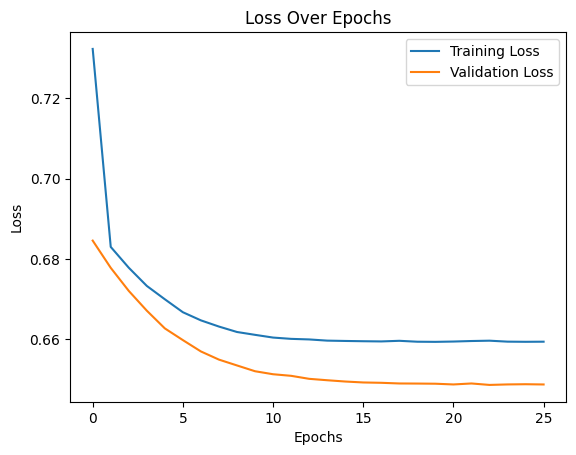

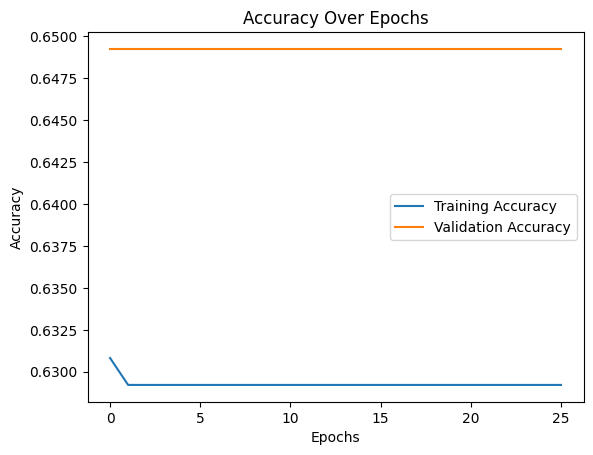

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# 1. 데이터 로드와 탐색
df = pd.read_csv('train.csv')
print(df.shape)
print(df.info())
df.head()

# 2. 데이터 전처리
encoder = OneHotEncoder(sparse_output=False)
encoding = encoder.fit_transform(df[['Sex']])
sex_df = pd.DataFrame(encoding, columns=encoder.get_feature_names_out())
df = pd.concat([df,sex_df], axis=1)

data = df[['Pclass', 'Sex_female', 'Sex_male', 'Age']]
target = df['Survived']

# 3. 데이터 분할
# 학습, 결과 데이터 7:3 으로 분할
x_train,x_temp,y_train,y_temp = train_test_split(data, target, test_size=0.3,random_state=42)

# 최종적으로 7 : 1.5 : 1.5 로 분할 
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# 4. 딥러닝 모델 구축 및 학습
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층
    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한 
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
 ])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                patience=3, 
                                                restore_best_weights=True)
 # 모델 훈련
history=model.fit(x_train, 
                  y_train, 
                  validation_data=(x_val, y_val), 
                  epochs=50, 
                  batch_size=32, 
                  callbacks=[early_stopping]
                  )

# 테스트 데이터로 성능 평가
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(f"TestLoss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 새로운 데이터에 대한 예측 수행
predictions=model.predict(x_test)
predicted_classes=(predictions>0.5).astype(int) # 0.5를 기준으로 클래스 결정

# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassificationReport:")
print(classification_report(y_test, predicted_classes))

# 5. 결과 시각화
 # 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
 # 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [64]:
df = pd.read_csv('train.csv')
print('데이터셋의 데이터와 특성의 개수 : ',df.shape)
print(df.info())
print('상위 5개 데이터')
df.head()


데이터셋의 데이터와 특성의 개수 :  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
상위 5개 데이터


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df[df['Cabin'].notna()] # Cabin 특성은 결측치도 많고 중요한 데이터 같지도 않아 삭제
df = df.drop('Cabin', axis=1)

In [12]:
df.isnull().sum()
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoding = encoder.fit_transform(df[['Sex']])
sex_df = pd.DataFrame(encoding, columns=encoder.get_feature_names_out())
df = pd.concat([df,sex_df], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoding = encoder.fit_transform(df[['Embarked']])
df2 = pd.DataFrame(encoding, columns=encoder.get_feature_names_out())
df = pd.concat([df,df2], axis=1)
df = df.drop('Embarked', axis=1)
df

In [25]:
data = df[['Pclass', 'Sex_female', 'Sex_male', 'Age']]
target = df['Survived']

In [26]:
# 학습, 결과 데이터 7:3 으로 분할
x_train,x_temp,y_train,y_temp = train_test_split(data, target, test_size=0.3,random_state=42)

# 최종적으로 7 : 1.5 : 1.5 로 분할 
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층
    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한 
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
 ])

In [28]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [51]:
# 4. Early Stopping 설정
# 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                patience=3, 
                                                restore_best_weights=True)
 # 5. 모델 훈련
history=model.fit(x_train, 
                  y_train, 
                  validation_data=(x_val, y_val), 
                  epochs=50, 
                  batch_size=32, 
                  callbacks=[early_stopping]
                  )

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7794 - loss: 0.4566 - val_accuracy: 0.7463 - val_loss: 0.5089
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8209 - loss: 0.4531 - val_accuracy: 0.7612 - val_loss: 0.4810
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8167 - loss: 0.4362 - val_accuracy: 0.7313 - val_loss: 0.5294
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7762 - loss: 0.4947 - val_accuracy: 0.7612 - val_loss: 0.4855
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7370 - loss: 0.5157 - val_accuracy: 0.7388 - val_loss: 0.4900


In [52]:
# 테스트 데이터로 성능 평가
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(f"TestLoss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7724 - loss: 0.4589 
TestLoss: 0.4453, Test Accuracy: 0.7910


In [53]:
# 새로운 데이터에 대한 예측 수행
predictions=model.predict(x_test)
predicted_classes=(predictions>0.5).astype(int) # 0.5를 기준으로 클래스 결정

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [54]:
# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassificationReport:")
print(classification_report(y_test, predicted_classes))


ClassificationReport:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        70
           1       0.85      0.69      0.76        64

    accuracy                           0.79       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.80      0.79      0.79       134



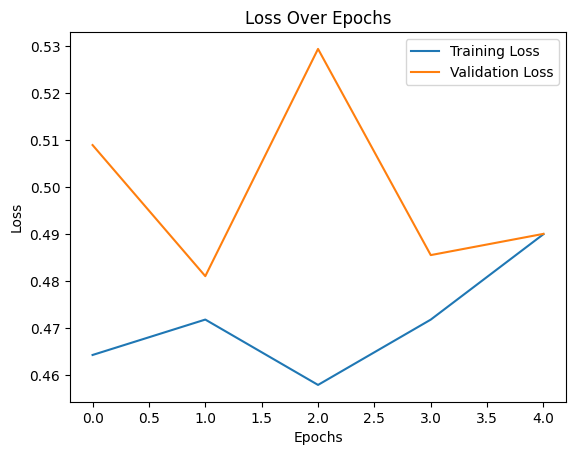

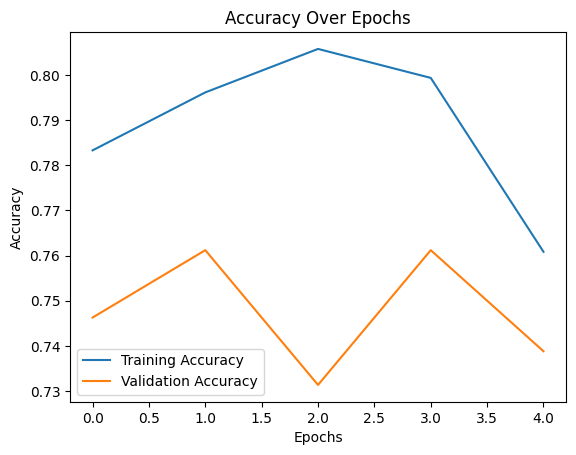

In [55]:
# 9. 학습 결과 시각화 (Optional)
 # 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
 # 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()